In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def iniciar_parametros(layer_dims):
    parameters = {}
    L = len(layer_dims)

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
    return parameters

In [3]:
def actualizar_parametros(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

In [4]:
def activacion_forward(A_prev, W, b, activation):
    Z = W.dot(A_prev) + b
    linear_cache = (A_prev, W, b)     
    if activation == "tanh":
        A = np.tanh(Z)
        activation_cache = Z
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [5]:
def red_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2
    for l in range(1, L):
        A_prev = A 
        A, cache = activacion_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "tanh")
        caches.append(cache)
    
    AL, cache = activacion_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "tanh")
    caches.append(cache)
    
    return AL, caches

In [6]:
def activacion_backward(dA, cache, activation):
    linear_cache, activation_cache = cache    
    if activation == "tanh":
        dZ = dA * (1 - np.power(np.tanh(activation_cache),2))
    A_prev, W, b = linear_cache
    m = A_prev.shape[1]
    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    return dA_prev, dW, db

In [7]:
def red_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    dAL = (AL - Y)
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = activacion_backward(dAL, current_cache, activation = "tanh")
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = activacion_backward(grads["dA" + str(l + 1)], current_cache, activation = "tanh")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

In [8]:
def red(X, Y, layers_dims, learning_rate = 0.01, num_iterations = 1000, print_cost=False):
    m = Y.shape[1]
    costs = []
    parameters = iniciar_parametros(layers_dims)
    
    for i in range(0, num_iterations):
        AL, caches =  red_forward(X, parameters)
        cost = (1/2) * np.sum(np.power(AL - Y, 2))
        cost = np.squeeze(cost)    
        costs.append(cost)    
        grads = red_backward(AL, Y, caches)
        parameters = actualizar_parametros(parameters, grads, learning_rate)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (por cien)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [9]:
train_x = np.array([[-1, -1], 
                    [ 1, -1], 
                    [-1,  1], 
                    [ 1,  1]]).T
train_y = np.array([[-1], 
                    [ 1], 
                    [ 1], 
                    [-1]]).T

Cost after iteration 0: 2.425213
Cost after iteration 100: 0.121727
Cost after iteration 200: 0.028110
Cost after iteration 300: 0.014194
Cost after iteration 400: 0.009163
Cost after iteration 500: 0.006653


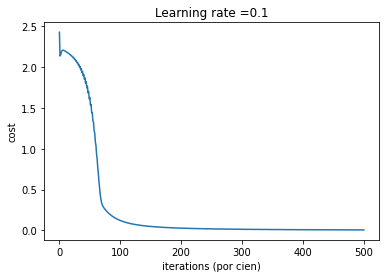

In [13]:
layers_dims = [train_x.shape[0], 100, 1]
parameters = red(train_x, train_y, layers_dims, learning_rate = 0.1, num_iterations = 501, print_cost = True)

In [14]:
def predecir(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    probas, caches = red_forward(X, parameters)
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0:
            p[0,i] = 1
        else:
            p[0,i] = -1
    print("predictions: " + str(p))
    print("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [15]:
pred_train = predecir(train_x, train_y, parameters)

predictions: [[-1.  1.  1. -1.]]
true labels: [[-1  1  1 -1]]
Accuracy: 1.0
